# A Most Diligent Inquiry into the Rents, Dimensions, and Other Peculiarities of the Dwellings Provided HOAS, with Remarks on Their Variability, Availability, and Suitability


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Read the CSV file
df = pd.read_csv("with_grade.csv")


df.head()

,location,energy_class,condition,renovation_year,building_year,type,address,rooms,surface_area,count,...,rating,Pesutupa,Hissi,Sauna,Remontoitu tai uusi,Internet: DNA,Vesimaksu kulutuksen mukaan,Internet: Trinet,Internet: Telia,Kerhotila
0,"Otaniemi-Tapiola, Espoo",A,hyvä,-,2019,Soluhuone,Miestentie 2,1h,15,6,...,no rating,1,1,1,0,1,0,0,0,1
1,"Otaniemi-Tapiola, Espoo",A,hyvä,-,2019,Soluhuone,Miestentie 2,1h,15,6,...,no rating,1,1,1,0,1,0,0,0,1
2,"Otaniemi-Tapiola, Espoo",A,hyvä,-,2019,Soluhuone,Miestentie 2,1h,15.5,5,...,no rating,1,1,1,0,1,0,0,0,1
3,"Otaniemi-Tapiola, Espoo",A,hyvä,-,2019,Soluhuone,Miestentie 2,1h,16,7,...,no rating,1,1,1,0,1,0,0,0,1
4,"Otaniemi-Tapiola, Espoo",A,hyvä,-,2019,Yksiö,Miestentie 2,1h+kt,23.5,95,...,no rating,1,1,1,0,1,0,0,0,1


In [ ]:
# Some cleaning up:


# Ensure correct datatypes
df['rent'] = pd.to_numeric(df['rent'], errors='coerce')
df['building_year'] = pd.to_numeric(df['building_year'], errors='coerce')

# Convert renovation_year: replace '-' with NaN and convert to numeric
df['renovation_year'] = df['renovation_year'].replace("-", np.nan)
df['renovation_year'] = pd.to_numeric(df['renovation_year'], errors='coerce')

# Convert rating: replace 'no rating' with NaN and convert to numeric
df['rating'] = df['rating'].replace("no rating", np.nan)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# convert condition: replace 'no condition' with NaN
df['condition'] = df['condition'].replace("no condition", np.nan)
# assign numeric values to condition:
df['condition'] = df['condition'].replace("tyydyttävä", 1).infer_objects(copy=False)
df['condition'] = df['condition'].replace("hyvä", 2).infer_objects(copy=False)
df['condition'] = df['condition'].replace("erinomainen", 3).infer_objects(copy=False)


# Convert surface_area:
df['surface_area'] = pd.to_numeric(df['surface_area'], errors='coerce')

bool_columns = df.columns[12:] 
df[bool_columns] = df[bool_columns].astype(int)

# Create new features
current_year = 2025  # NOTE: check the current year :D
df['building_age'] = current_year - df['building_year']
df['years_since_reno'] = current_year - df['renovation_year']
df['years_since_reno'] = df['years_since_reno'].fillna(df['building_age'])  # If never renovated, assume original age
df['rent_sqm'] = df['rent'] / df['surface_area']

print(len(df))
# remove rows where rent is 0 or empty
df = df[df['rent'] > 0]
print(len(df))

print(df.info())

2476
2464
<class 'pandas.core.frame.DataFrame'>
Index: 2464 entries, 0 to 2475
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   location                     2464 non-null   object 
 1   energy_class                 2464 non-null   object 
 2   condition                    1320 non-null   float64
 3   renovation_year              1470 non-null   float64
 4   building_year                2464 non-null   int64  
 5   type                         2464 non-null   object 
 6   address                      2464 non-null   object 
 7   rooms                        2464 non-null   object 
 8   surface_area                 2464 non-null   float64
 9   count                        2464 non-null   int64  
 10  rent                         2464 non-null   float64
 11  rating                       1371 non-null   float64
 12  Pesutupa                     2464 non-null   int64  
 13  Hissi        

C:\Users\Otso\AppData\Local\Temp\ipykernel_28308\455266027.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['condition'] = df['condition'].replace("erinomainen", 3).infer_objects(copy=False)


In [4]:
# since the original data contains many apts on a single row, we expand based on the count column.

df_expanded = df.loc[df.index.repeat(df['count'])].drop(columns=['count']).reset_index(drop=True)

# Check result
print(df_expanded.head())  # Display first few rows to verify expansion
print(f"Original size: {len(df)}, Expanded size: {len(df_expanded)}")

# a total of ~14000 apts makes sense since we are counting every cell room as an apt. 

print(df_expanded.info())

                  location energy_class  condition  renovation_year  \
0  Otaniemi-Tapiola, Espoo            A        2.0              NaN   
1  Otaniemi-Tapiola, Espoo            A        2.0              NaN   
2  Otaniemi-Tapiola, Espoo            A        2.0              NaN   
3  Otaniemi-Tapiola, Espoo            A        2.0              NaN   
4  Otaniemi-Tapiola, Espoo            A        2.0              NaN   

   building_year       type       address rooms  surface_area   rent  ...  \
0           2019  Soluhuone  Miestentie 2    1h          15.0  440.0  ...   
1           2019  Soluhuone  Miestentie 2    1h          15.0  440.0  ...   
2           2019  Soluhuone  Miestentie 2    1h          15.0  440.0  ...   
3           2019  Soluhuone  Miestentie 2    1h          15.0  440.0  ...   
4           2019  Soluhuone  Miestentie 2    1h          15.0  440.0  ...   

   Sauna  Remontoitu tai uusi  Internet: DNA  Vesimaksu kulutuksen mukaan  \
0      1                    0    

In [5]:
# Sanity check for apt counts in kitarakuja 3
print(df_expanded[df_expanded['address'] == 'Kitarakuja 3'].shape[0]) # should be 273

print(df_expanded['type'].unique()) 

273
['Soluhuone' 'Yksiö' 'Kaksio' 'Kalustettu yksiö' 'Kolmio'
 'Kalustettu soluhuone' 'Furnished shared studio']


In [ ]:
# sanity check knowing that there there were  ~19065  people living at HOAS properties in 2023.
cell_apts = df_expanded[df_expanded['type'] == "Soluhuone"].shape[0]
cell_apts += df_expanded[df_expanded['type'] == "Kalustettu soluhuone"].shape[0]
cell_apts += df_expanded[df_expanded['type'] == "Furnished shared studio"].shape[0]

studios = df_expanded[df_expanded['type'] == "Yksiö"].shape[0]
studios += df_expanded[df_expanded['type'] == "Kalustettu yksiö"].shape[0]

two_bdrm = df_expanded[df_expanded['type'] == "Kaksio"].shape[0]

three_bdrm = df_expanded[df_expanded['type'] == "Kolmio"].shape[0]

print(f"Total number of people living in cell APTS (assuming one person per room :D): {cell_apts}")
print(f"Total number of people living in studios (assuming one person per apt): {studios}")
print(f"Total number of people living in two bedroom apts (assuming two people per apt): {two_bdrm*2}") # assume 2 
print(f"Total number of people living in three bedroom apts (assuming two people per apt): {three_bdrm*2}") # assume 2

# sanity check for the total number of people living in HOAS properties
print(f"Total number of people living in HOAS properties: {cell_apts + studios + two_bdrm*2 + three_bdrm*2}")

Total number of people living in cell APTS (assuming one person per room :D): 4887
Total number of people living in studios (assuming one person per apt): 3776
Total number of people living in two bedroom apts (assuming two people per apt): 7952
Total number of people living in three bedroom apts (assuming two people per apt): 3374
Total number of people living in HOAS properties: 19989


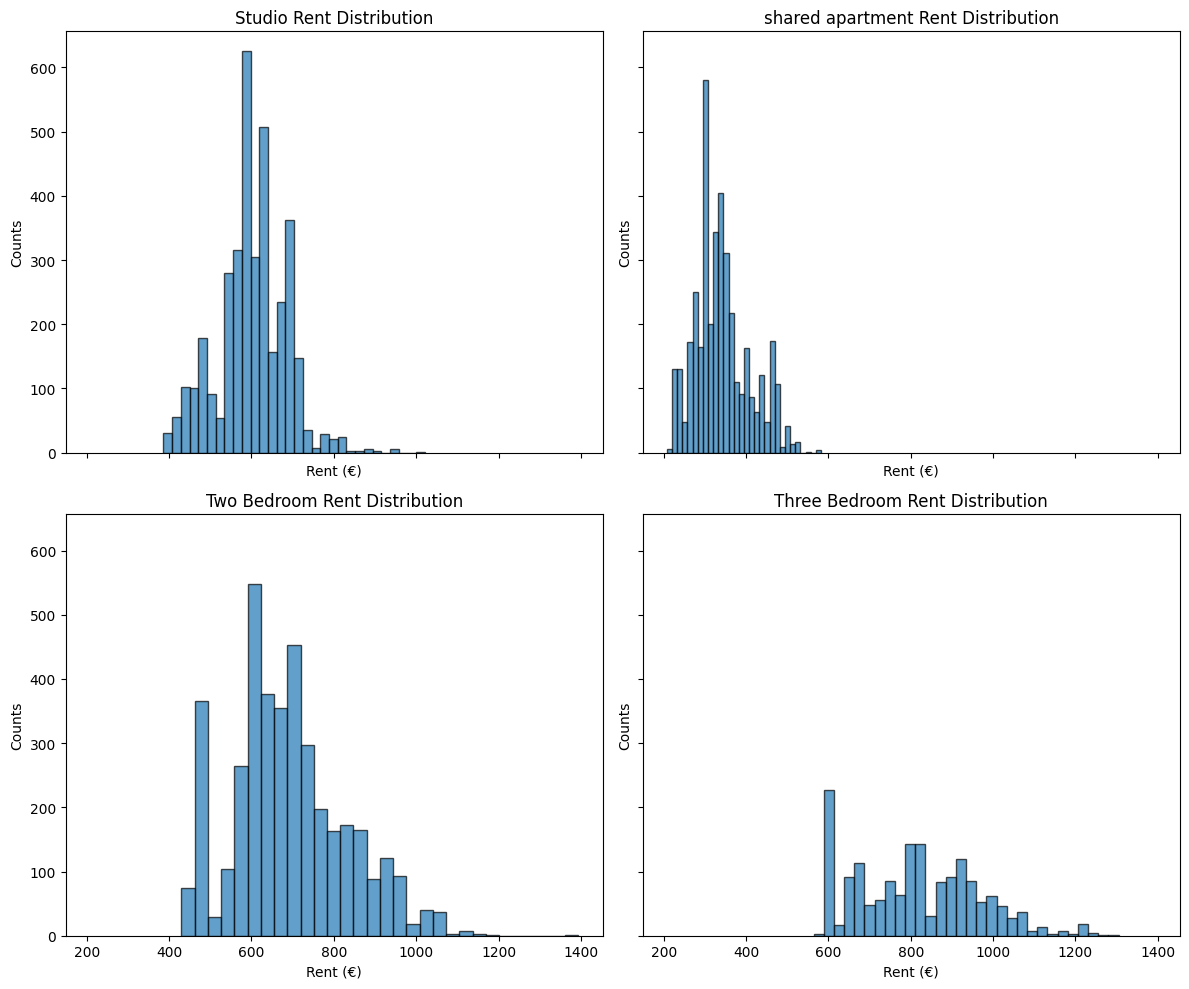

In [ ]:
apartment_types = ["Yksiö", "Soluhuone", "Kaksio", "Kolmio"]
fin_eng_dict = {"Yksiö": "Studio", "Soluhuone": "shared apartment", "Kaksio": "Two Bedroom", "Kolmio": "Three Bedroom"}
colors = ["blue", "green", "red", "yellow"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.flatten()  

for ax, apt_type in zip(axes, apartment_types):
    subset = df_expanded[df_expanded['type'] == apt_type]['rent']
    
    ax.hist(subset, bins=30, alpha=0.7, edgecolor="black")
    ax.set_title(f"{fin_eng_dict[apt_type]} Rent Distribution")
    ax.set_xlabel("Rent (€)")
    ax.set_ylabel("Counts")



plt.tight_layout()
plt.show()

In [8]:
df_expanded['years_since_reno'].describe()


count    14326.000000
mean        13.959724
std          8.263090
min          1.000000
25%          7.000000
50%         12.000000
75%         21.000000
max         35.000000
Name: years_since_reno, dtype: float64

In [9]:
df['years_since_reno'].describe()

count    2464.000000
mean       14.602679
std         8.540701
min         1.000000
25%         7.000000
50%        13.000000
75%        21.000000
max        35.000000
Name: years_since_reno, dtype: float64

In [ ]:
# helper plotters to plot by location:


ALL_LOC = df['location'].unique()
all_locs = ['Hakuninmaa, Helsinki', 'Länsi-Pasila, Helsinki',
       'Espoon keskus-Suvela, Espoo', 'Ruskeasuo, Helsinki',
       'Viikki, Helsinki', 'Heikinlaakso, Helsinki', 'Korso, Vantaa',
       'Itäkeskus, Helsinki', 'Kannelmäki, Helsinki',
       'Ruskeasanta, Vantaa', 'Herttoniemi, Helsinki',
       'Malmi-Pukinmäki, Helsinki', 'Laajasalo, Helsinki',
       'Katajanokka, Helsinki', 'Oulunkylä, Helsinki', 'Myyrmäki, Vantaa',
       'Koskela-Kumpula, Helsinki', 'Myllypuro, Helsinki',
       'Tali, Helsinki', 'Lauttasaari, Helsinki',
       'Jokiniemi-Tikkurila, Vantaa', 'Arabia-Toukola, Helsinki',
       'Otaniemi teekkarikylä, Espoo', 'Leppävaara-Vermonniitty, Espoo',
       'Mellunmäki, Helsinki', 'Suutarila, Helsinki',
       'Otaniemi-Tapiola, Espoo', 'Kamppi, Helsinki',
       'Kontula-Kurkimäki, Helsinki', 'Hermanni-Sörnäinen, Helsinki',
       'Itä-Pasila-Vallila, Helsinki', 'Jätkäsaari-Ruoholahti, Helsinki',
       'Kalasatama, Helsinki', 'Malminkartano, Helsinki', 'Kilo, Espoo',
       'Rastila, Helsinki', 'Kauniainen, Kauniainen', 'Haaga, Helsinki',
       'Pitäjänmäki, Helsinki', 'Matinkylä, Espoo', 'Kivenlahti, Espoo',
       'Koivukylä, Vantaa', 'Merihaka, Helsinki']

small_loc = ['Kamppi, Helsinki', 'Länsi-Pasila, Helsinki', 'Katajanokka, Helsinki', 'Kannelmäki, Helsinki', 'Itä-Pasila-Vallila, Helsinki']

human_readable_condition = ['nan', 'tyydyttävä', 'hyvä', 'erinomainen']


apartment_counts = df_expanded['location'].value_counts()
top_7_areas = apartment_counts.nlargest(7).index.tolist()

top_7_and_pasila = top_7_areas + ['Länsi-Pasila, Helsinki']



def plot_by_location(df, quantity: str, locations=ALL_LOC,):

    # Group by location and compute average rent
    avg_rents = np.array([df[df['location'] == loc][quantity].mean() for loc in locations])

    types = df['type'].unique()

    # Sort locations by average rent for better visualization
    sorted_indices = np.argsort(avg_rents)
    locations_sorted = np.array(locations)[sorted_indices]
    avg_rents_sorted = avg_rents[sorted_indices]

    # Plot rents by location
    plt.figure(figsize=(10, 10))
    plt.barh(locations_sorted, avg_rents_sorted, color='green', edgecolor='black', alpha=0.7)
    plt.xlabel(f"Average {quantity} (€)")
    plt.ylabel("Location")
    plt.title(f"Average {quantity} by Location for {types}")
    plt.grid(axis='x', linestyle='--', alpha=0.7)


    plt.show()

def plot_boxplot_by_location(df, quantity: str, locations=ALL_LOC, cutoff=0):
    # Prepare data for boxplot
    data_to_plot = []
    labels_with_n = []

    types = df['type'].unique()

    for loc in locations:
        df_loc = df[df['location'] == loc]

        if cutoff > 0:
            # Split data based on years_since_reno if cutoff is set
            newer_renovations = df_loc[df_loc['years_since_reno'] < cutoff][quantity].dropna()
            older_renovations = df_loc[df_loc['years_since_reno'] >= cutoff][quantity].dropna()

            if not newer_renovations.empty:
                data_to_plot.append(newer_renovations)
                labels_with_n.append(f"{loc}, new (n={len(newer_renovations)})")

            if not older_renovations.empty:
                data_to_plot.append(older_renovations)
                labels_with_n.append(f"{loc}, old yrs (n={len(older_renovations)})")
        else:
            all_data = df_loc[quantity].dropna()
            if not all_data.empty:
                data_to_plot.append(all_data)
                labels_with_n.append(f"{loc} (n={len(all_data)})")

    # Medians for sorting
    medians = [data.median() for data in data_to_plot]
    sorted_indices = np.argsort(medians)

    # Sort data 
    sorted_data_to_plot = np.array(data_to_plot, dtype=object)[sorted_indices]
    sorted_labels = np.array(labels_with_n)[sorted_indices]

  
    plt.figure(figsize=(15, len(locations) // 4))
    plt.boxplot(sorted_data_to_plot, vert=False, patch_artist=True, tick_labels=sorted_labels)
    plt.xlabel(f"{quantity}")
    plt.ylabel("Location")
    plt.title(f"{quantity} Distribution by Location for {types}" + (f" (old/new cutoff: {cutoff} yrs since reno)" if cutoff > 0 else ""))
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()




def plot_boxplot_by_location_condition(df, quantity: str, locations=ALL_LOC):
    # Remove rows where condition is NaN
    df = df.dropna(subset=['condition'])

    # Prepare data for boxplot
    data_to_plot = []
    labels_with_n = []

    # Get unique condition levels and sort them
    condition_levels = sorted(df['condition'].dropna().unique())

    types = df['type'].unique()

    for loc in locations:
        df_loc = df[df['location'] == loc]

        for condition in condition_levels:
            condition_data = df_loc[df_loc['condition'] == condition][quantity].dropna()

            if not condition_data.empty:
                data_to_plot.append(condition_data)
                labels_with_n.append(f"{loc}, condition {human_readable_condition[int(condition)]} (n={len(condition_data)})")

    # Calculate medians for sorting
    medians = [data.median() for data in data_to_plot]
    sorted_indices = np.argsort(medians)

    # Sort data and labels by median
    sorted_data_to_plot = np.array(data_to_plot, dtype=object)[sorted_indices]
    sorted_labels = np.array(labels_with_n)[sorted_indices]

    # Plot boxplot by location
    plt.figure(figsize=(15, 10))
    plt.boxplot(sorted_data_to_plot, vert=False, patch_artist=True, tick_labels=sorted_labels)
    plt.xlabel(f"{quantity}")
    plt.ylabel("Location and Condition")
    plt.title(f"{quantity} Distribution by Location and Condition for {types}")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


In [29]:
# remove furnised apts from the data since they skew the data for areas with many exchange students
furnished_types = ['Kalustettu soluhuone', 'Kalustettu yksiö', 'Furnished shared studio']
df_cleaned = df_expanded[~df_expanded['type'].isin(furnished_types)].copy()





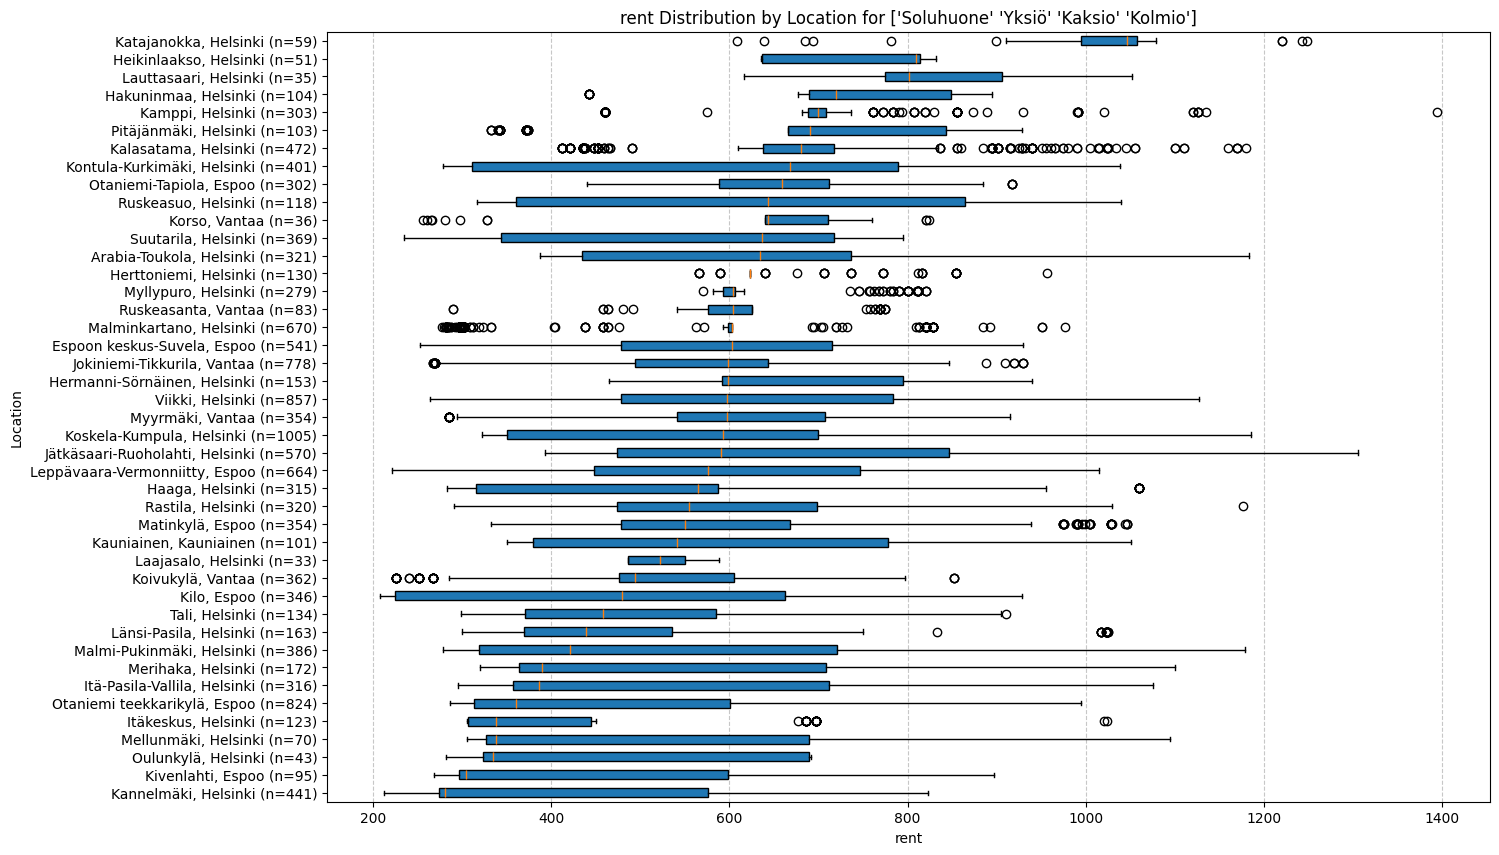

In [30]:
plot_boxplot_by_location(df_cleaned, 'rent')

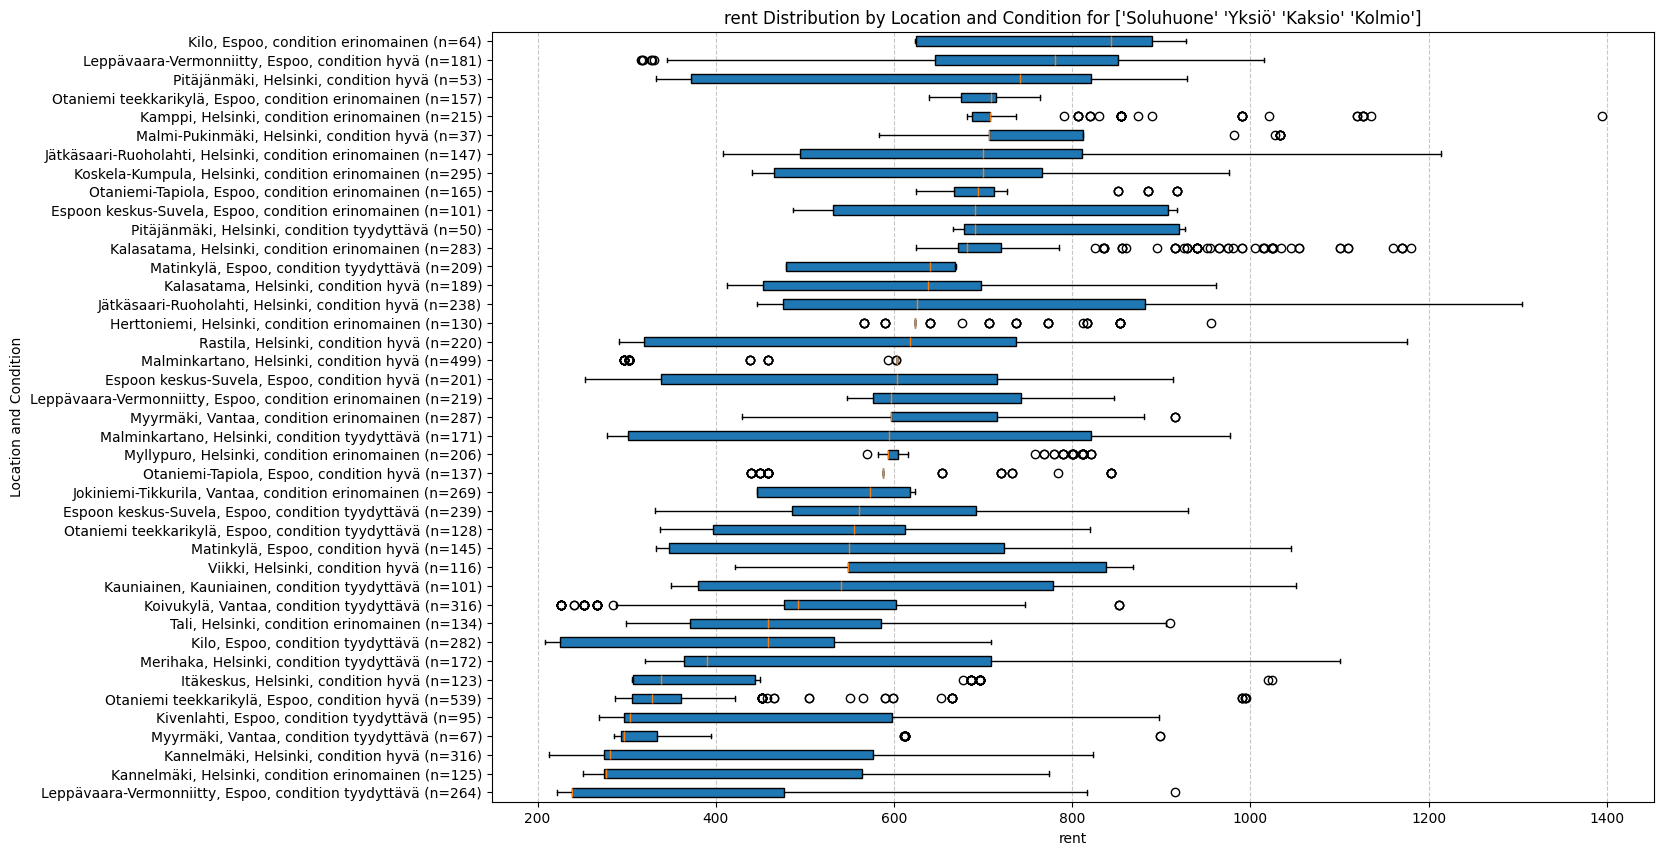

In [13]:
plot_boxplot_by_location_condition(df_cleaned, 'rent')

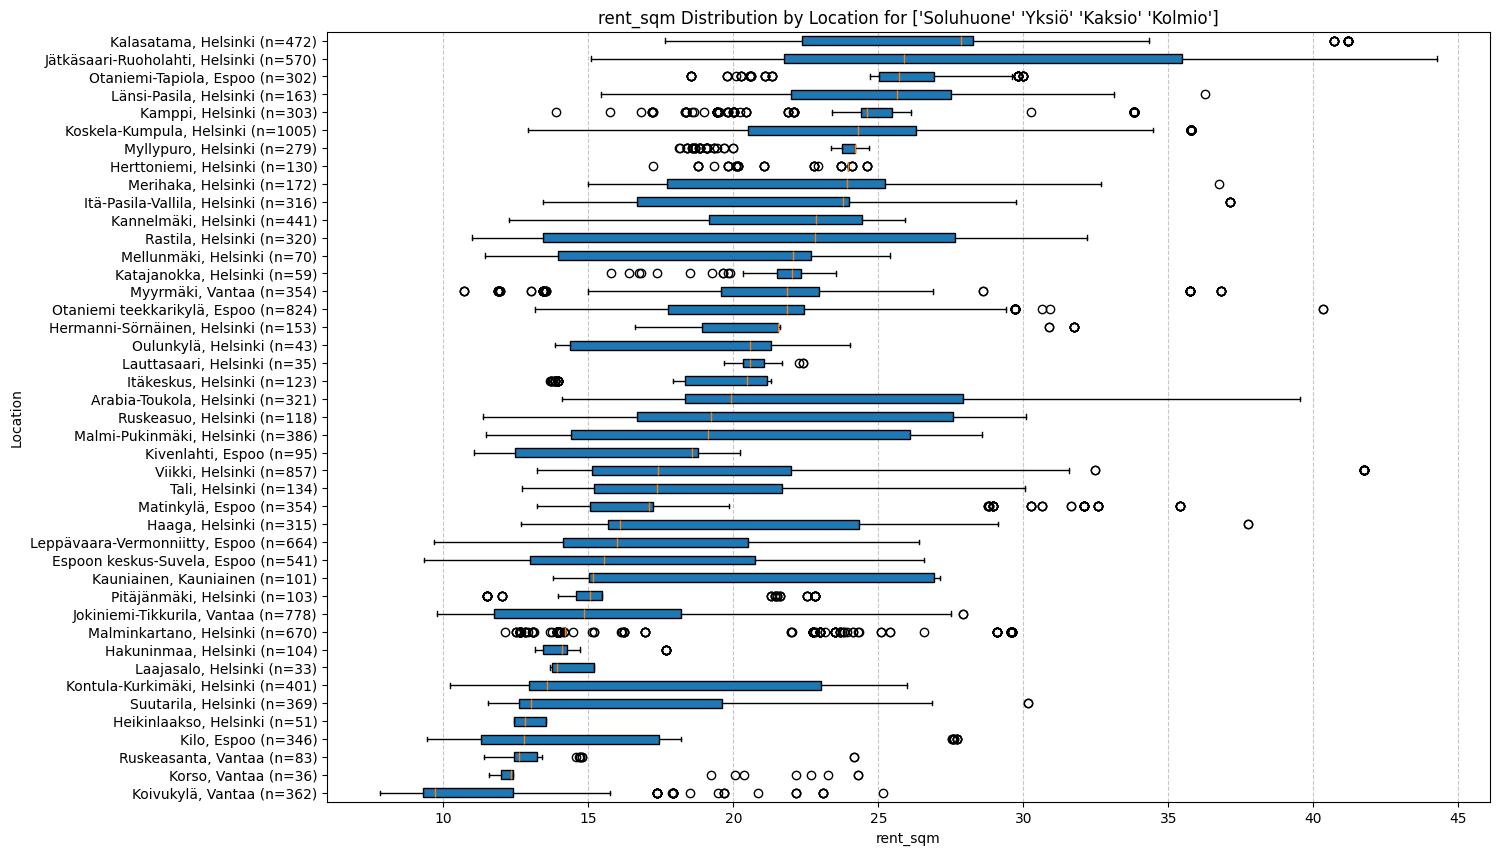

In [14]:
plot_boxplot_by_location(df_cleaned, 'rent_sqm')

NOTES: 
this includes all possible apt types, so a bit bad to use

In [15]:
unique_types = df_expanded["type"].unique()
print(unique_types)

['Soluhuone' 'Yksiö' 'Kaksio' 'Kalustettu yksiö' 'Kolmio'
 'Kalustettu soluhuone' 'Furnished shared studio']


In [16]:
yksio = df_cleaned[df_cleaned["type"] == "Yksiö"].copy()
yksio_wrong = df[df["type"] == "Yksiö"].copy()
kaksio = df_expanded[df_expanded["type"] == "Kaksio"].copy()
kolmio = df_expanded[df_expanded["type"] == "Kolmio"].copy()
solut = df_expanded[df_expanded["type"] == "Soluhuone"].copy()
kalustettu_yksiö = df_expanded[df_expanded["type"] == "Kalustettu yksiö"].copy()
kalustettu_soluhuone = df_expanded[df_expanded["type"] == "Kalustettu soluhuone"].copy()

top_7_studios = yksio['location'].value_counts().nlargest(7).index.tolist()
print(top_7_studios)
print(yksio['location'].value_counts().nlargest(7))

['Koskela-Kumpula, Helsinki', 'Jokiniemi-Tikkurila, Vantaa', 'Viikki, Helsinki', 'Kalasatama, Helsinki', 'Otaniemi-Tapiola, Espoo', 'Myllypuro, Helsinki', 'Kamppi, Helsinki']
location
Koskela-Kumpula, Helsinki      340
Jokiniemi-Tikkurila, Vantaa    329
Viikki, Helsinki               302
Kalasatama, Helsinki           302
Otaniemi-Tapiola, Espoo        254
Myllypuro, Helsinki            243
Kamppi, Helsinki               215
Name: count, dtype: int64


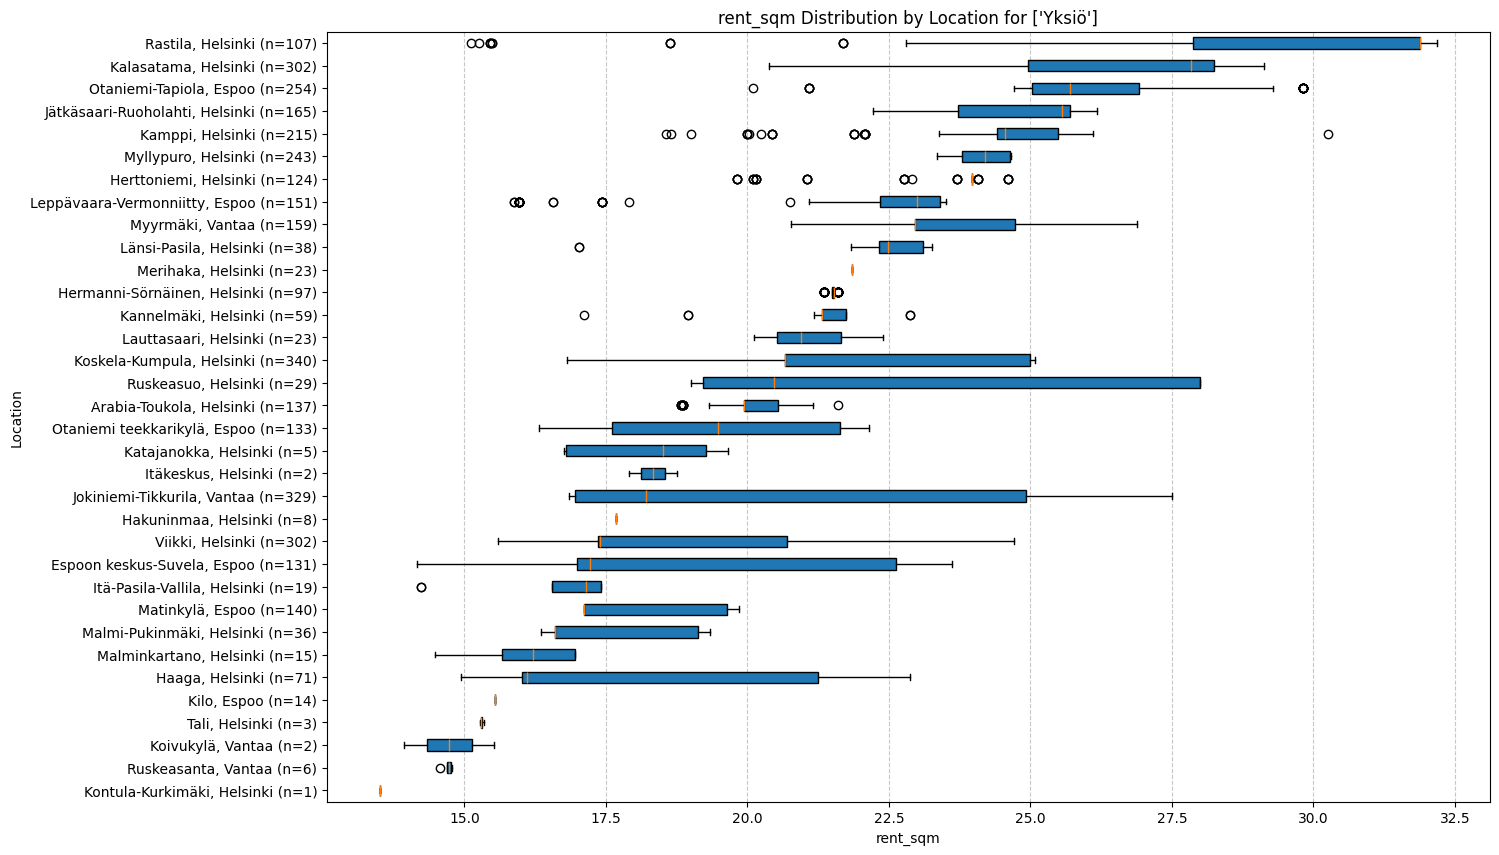

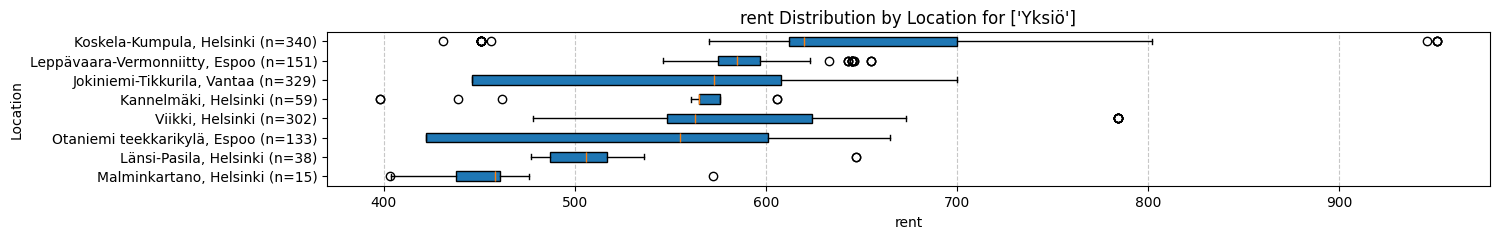

In [17]:
# Yksiöplot!
plot_boxplot_by_location(yksio, 'rent_sqm')
plot_boxplot_by_location(yksio, 'rent', top_7_and_pasila)

#plot_boxplot_by_location_condition(yksio, 'rent', top_7_areas)

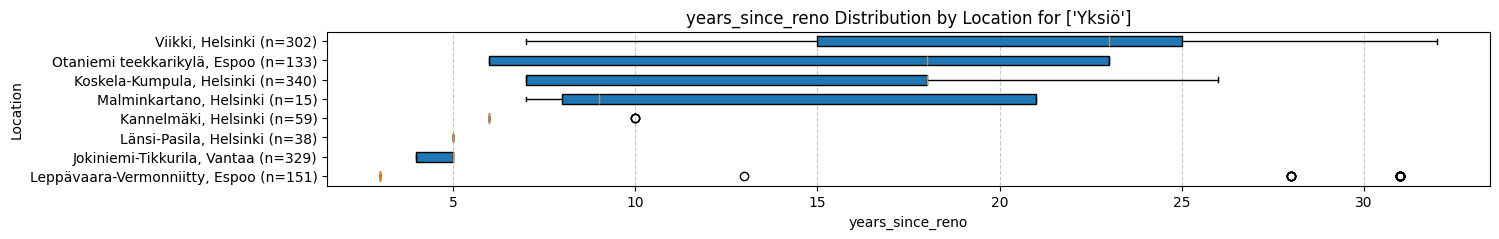

In [18]:
plot_boxplot_by_location(yksio, 'years_since_reno', top_7_and_pasila)



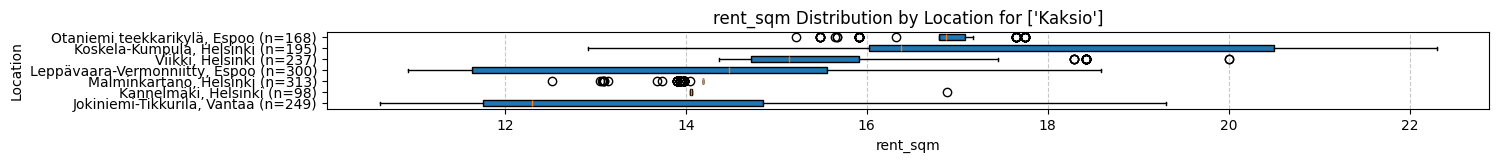

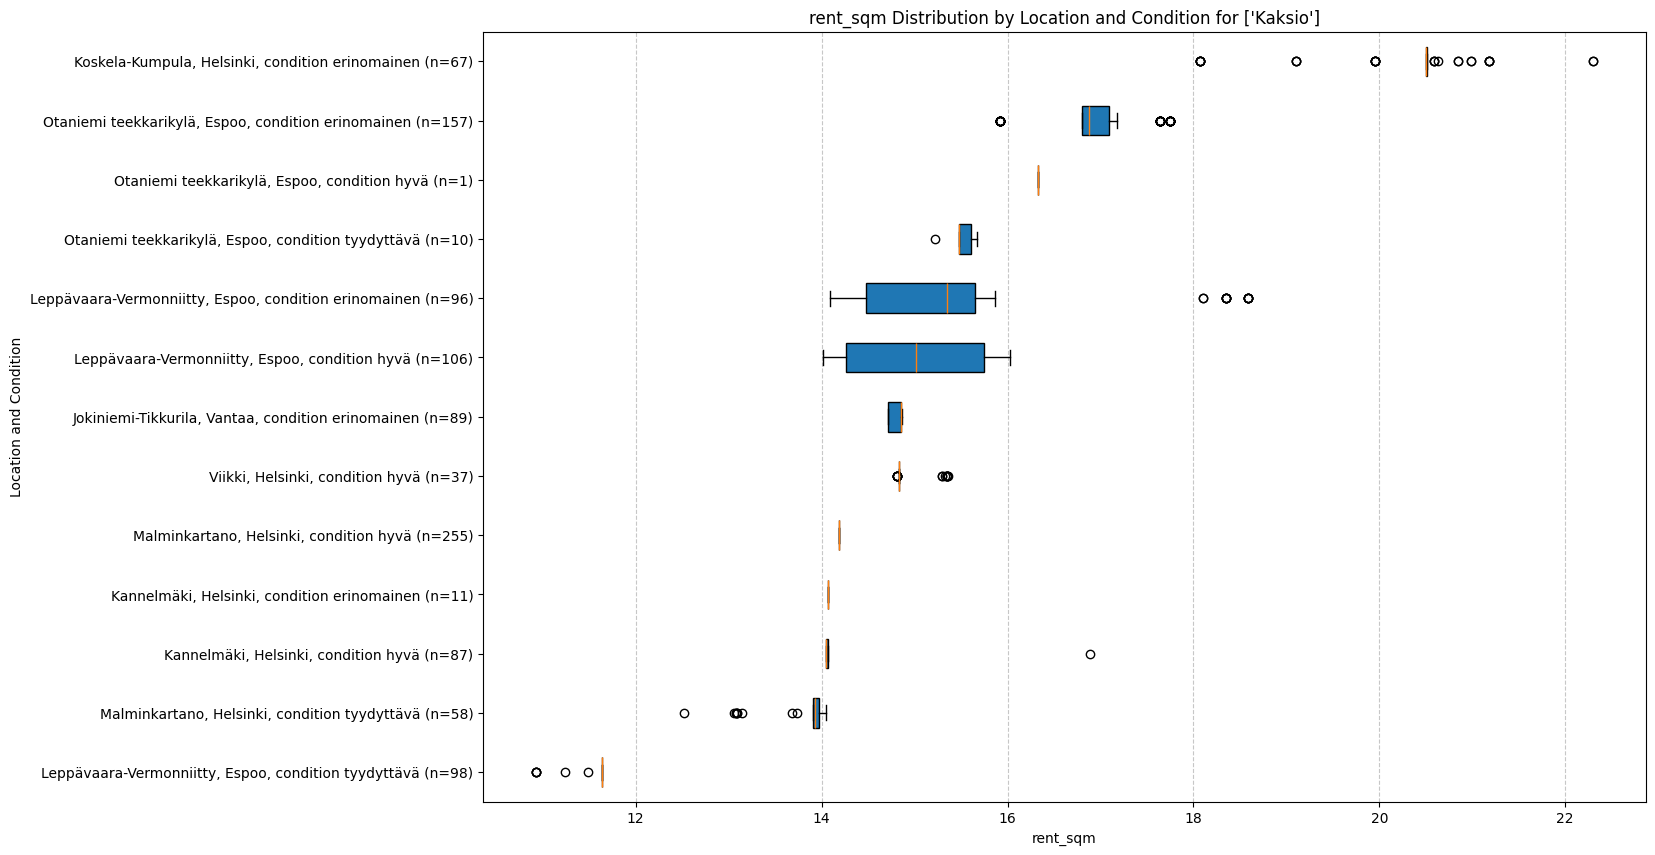

In [19]:
plot_boxplot_by_location(kaksio, 'rent_sqm', top_7_areas)
plot_boxplot_by_location_condition(kaksio, 'rent_sqm', top_7_areas)

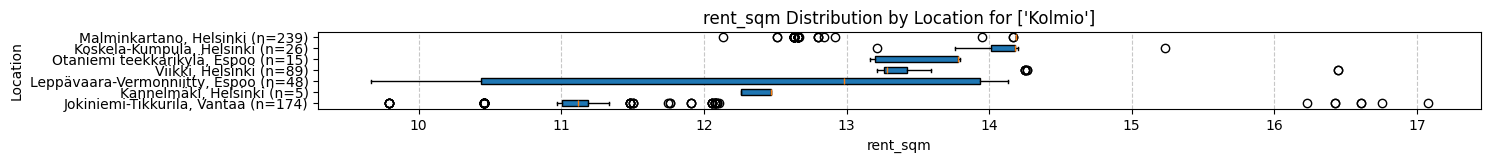

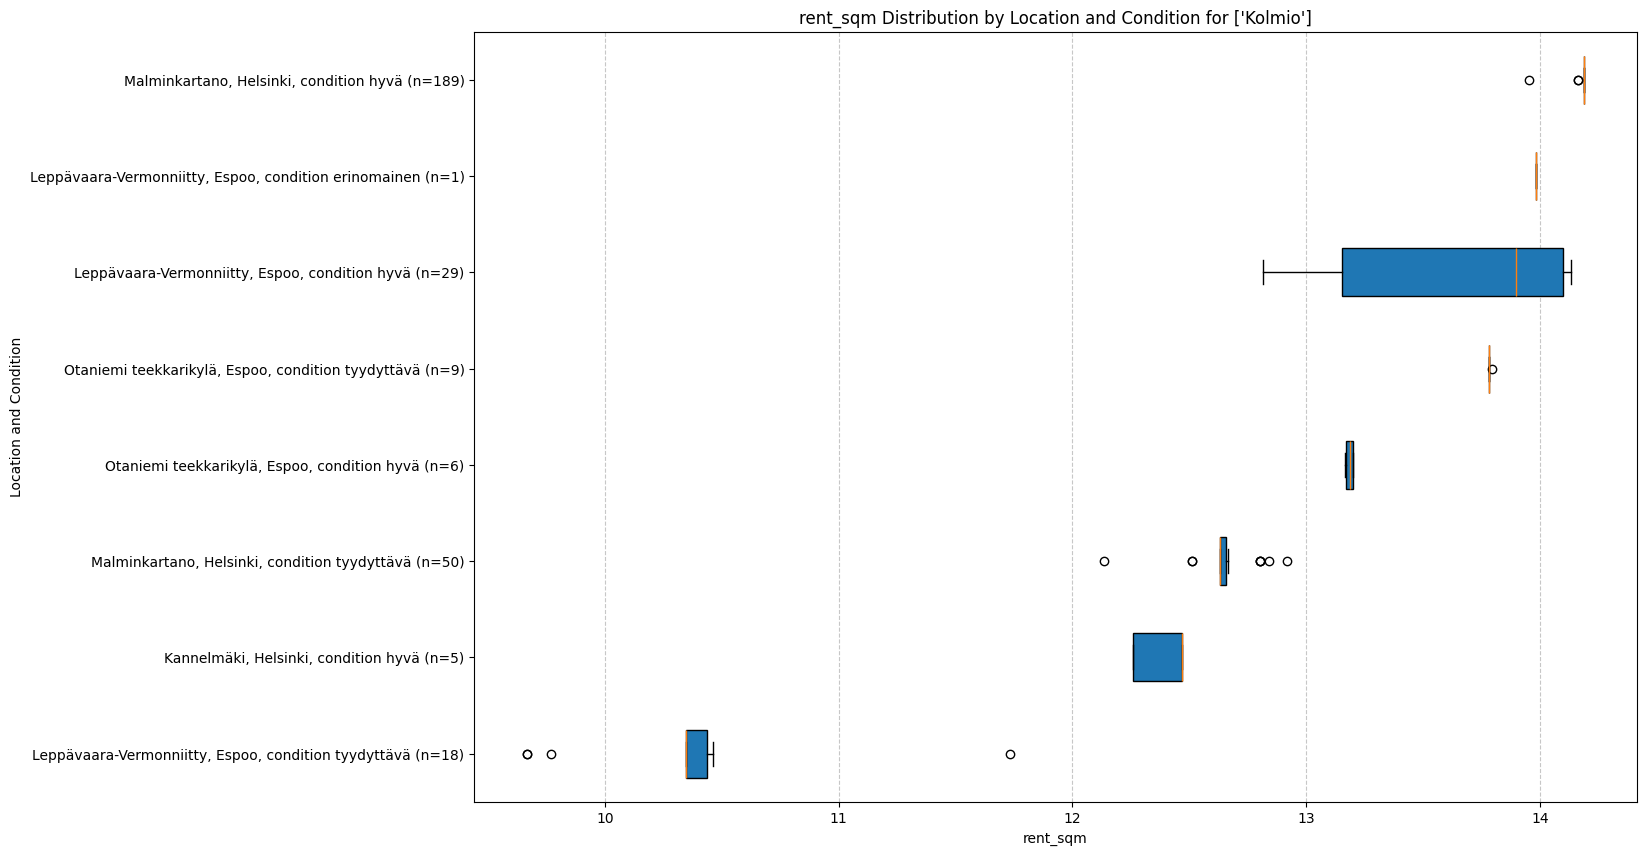

In [20]:
plot_boxplot_by_location(kolmio, 'rent_sqm', top_7_areas)
plot_boxplot_by_location_condition(kolmio, 'rent_sqm', top_7_areas)

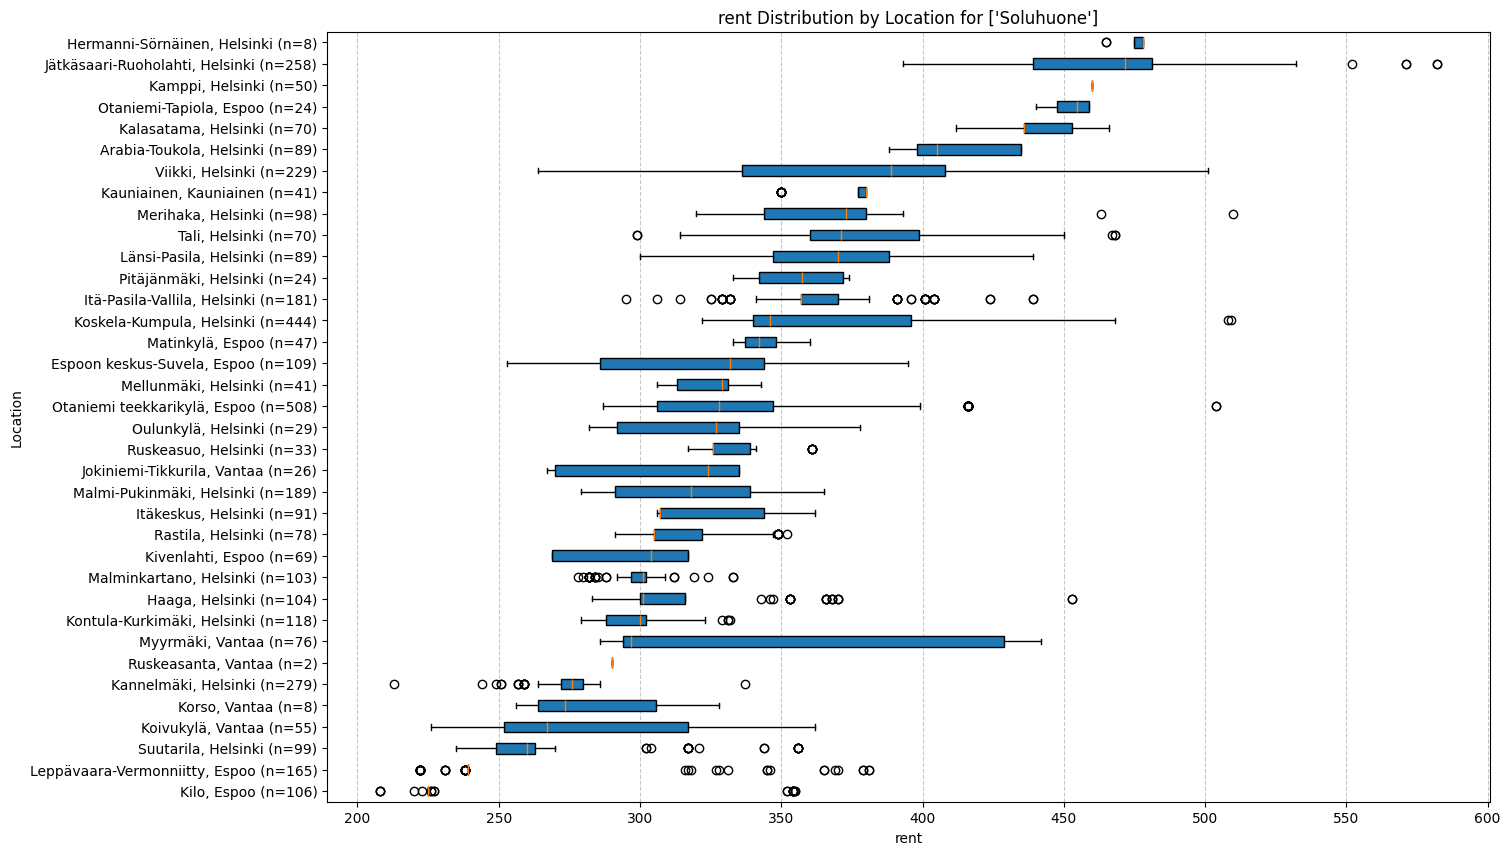

In [31]:
plot_boxplot_by_location(solut, 'rent')

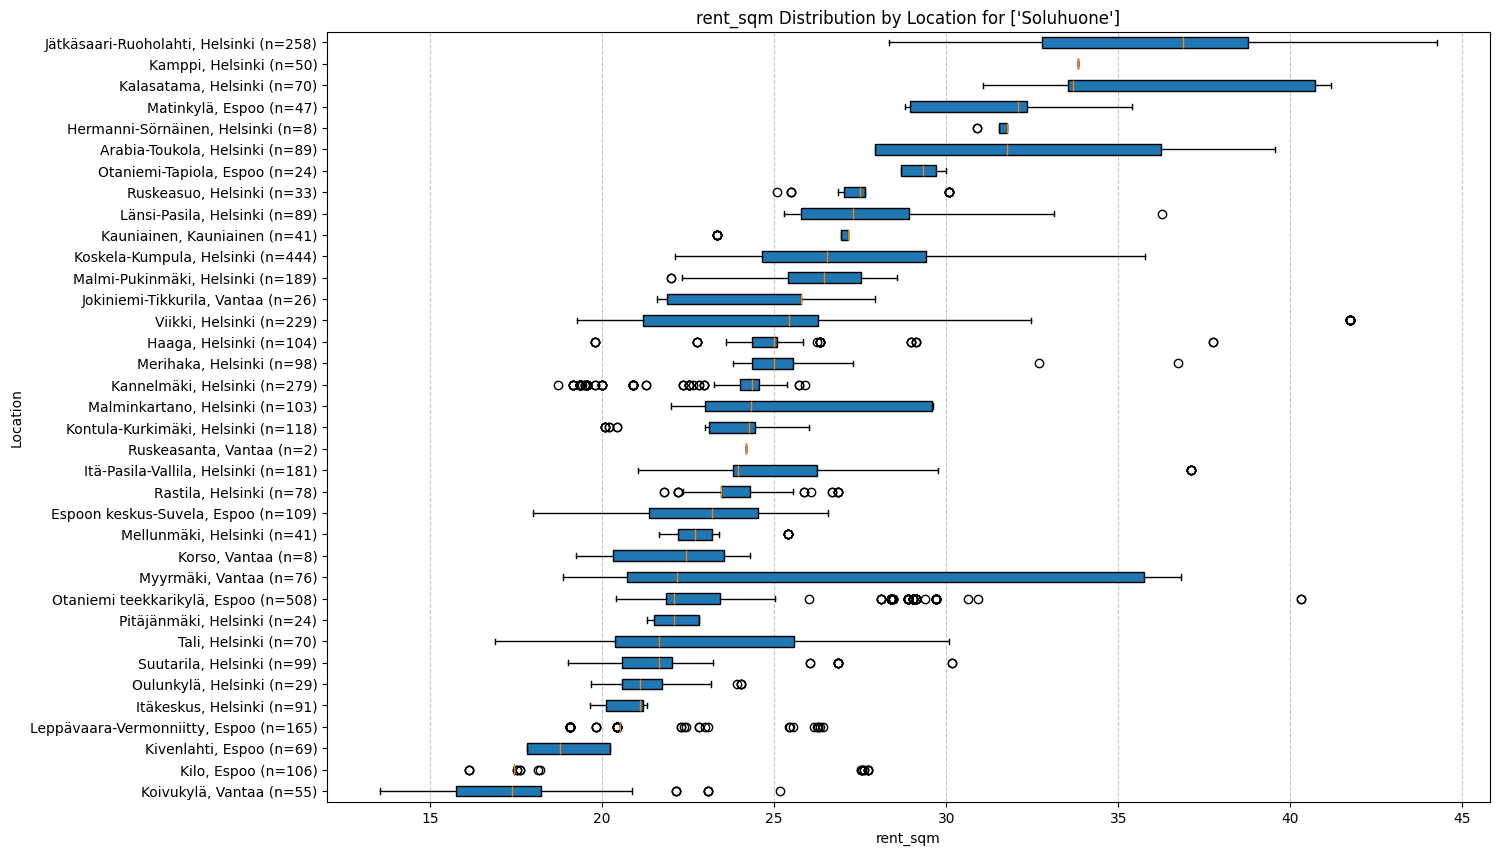

In [32]:
plot_boxplot_by_location(solut, 'rent_sqm')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def predict_rent(building_age, sauna, kerhotila, hissi, years_since_reno, location):
    new_apartment = pd.DataFrame({
        'building_age': [building_age],
        'Sauna': [sauna],
        'Kerhotila': [kerhotila],
        'Hissi': [hissi],
        'years_since_reno': [years_since_reno],
        'location': [location]
    })

    # One-hot enode the location
    location_encoded = encoder.transform(new_apartment[['location']])
    location_df = pd.DataFrame(location_encoded, columns=encoder.get_feature_names_out(['location']))

    # Combine numerical features with encoded location
    X_new = pd.concat([new_apartment[features].reset_index(drop=True), location_df], axis=1)

    X_new_scaled = scaler.transform(X_new)

    rent_sqm_pred = model.predict(X_new_scaled)
    
    return rent_sqm_pred[0]


# Select relevant numeric features
features = [
    'building_age',
    'years_since_reno' 
    
]

df_model = yksio.dropna(subset=features + ['rent_sqm']).copy()

encoder = OneHotEncoder(drop='first', sparse_output=False)
location_encoded = encoder.fit_transform(df_model[['location']])
location_df = pd.DataFrame(location_encoded, columns=encoder.get_feature_names_out(['location']))

# Combine numerical features with encoded location
X = pd.concat([df_model[features].reset_index(drop=True), location_df], axis=1)
y = df_model['rent_sqm'].reset_index(drop=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features (important for regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model evaluation
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R² Score: {r2_score(y_test, y_pred):.4f}')

# Feature importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

# Example usage:
building_age = 0
sauna = 1
kerhotila = 1
hissi = 1
years_since_reno = 0
location = 'Länsi-Pasila, Helsinki'

predicted_rent_sqm = predict_rent(building_age, sauna, kerhotila, hissi, years_since_reno, location)
print(f'Predicted Rent per Square Meter: {predicted_rent_sqm:.2f} €')


Mean Squared Error: 3.06
R² Score: 0.7717
                                     Feature  Coefficient
12                 location_Kamppi, Helsinki     1.676560
30                location_Rastila, Helsinki     0.662063
14            location_Katajanokka, Helsinki     0.548802
19            location_Lauttasaari, Helsinki     0.419703
25               location_Merihaka, Helsinki     0.316460
10  location_Jätkäsaari-Ruoholahti, Helsinki     0.301030
11             location_Kalasatama, Helsinki     0.208856
32              location_Ruskeasuo, Helsinki     0.165670
29          location_Otaniemi-Tapiola, Espoo     0.164239
18        location_Koskela-Kumpula, Helsinki     0.040458
21           location_Länsi-Pasila, Helsinki     0.014031
28     location_Otaniemi teekkarikylä, Espoo     0.003082
33                   location_Tali, Helsinki    -0.010217
13             location_Kannelmäki, Helsinki    -0.019401
15                      location_Kilo, Espoo    -0.025563
16                location_Koi

C:\Users\Otso\AppData\Local\Temp\ipykernel_28308\3743615019.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


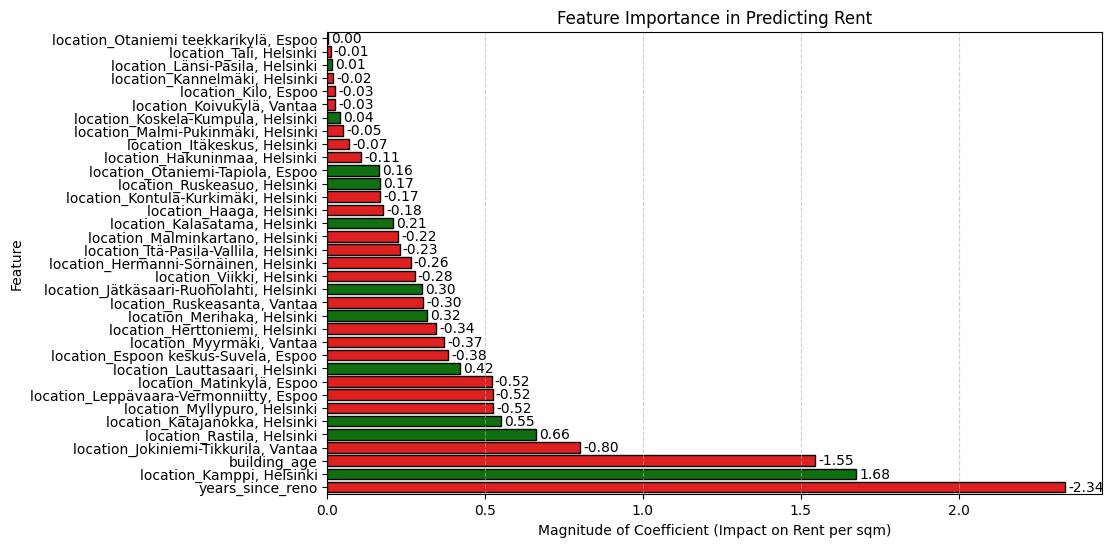

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize coefficients for better comparison
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
coefficients_sorted = coefficients.sort_values(by='Absolute Coefficient', ascending=True)

# Define colors: green for positive, red for negative coefficients
colors = ['green' if coef > 0 else 'red' for coef in coefficients_sorted['Coefficient']]

# Plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x=coefficients_sorted['Absolute Coefficient'], 
    y=coefficients_sorted['Feature'], 
    dodge=False,
    edgecolor='black',
    palette=colors
)

# Add title and labels
plt.xlabel('Magnitude of Coefficient (Impact on Rent per sqm)')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Rent')

# Add value labels
for bar, coef in zip(bars.patches, coefficients_sorted['Coefficient']):
    plt.text(bar.get_width() + 0.01,  # Position slightly outside the bar
             bar.get_y() + bar.get_height()/2,  # Centered vertically
             f'{coef:.2f}',  # Format to 2 decimals
             va='center', ha='left', fontsize=10)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show plot
plt.show()

The above shouldn't be trusted. That's a bad way to measure how important the coefficents are since most of them are correlated in some way. 



### KANNELMÄKI DEEP ANALYSIS



type
Soluhuone               279
Kalustettu soluhuone    248
Kaksio                   98
Yksiö                    59
Kolmio                    5
Name: count, dtype: int64
type
Kaksio                  641.438776
Kalustettu soluhuone    437.495968
Kolmio                  817.400000
Soluhuone               274.526882
Yksiö                   561.474576
Name: rent, dtype: float64


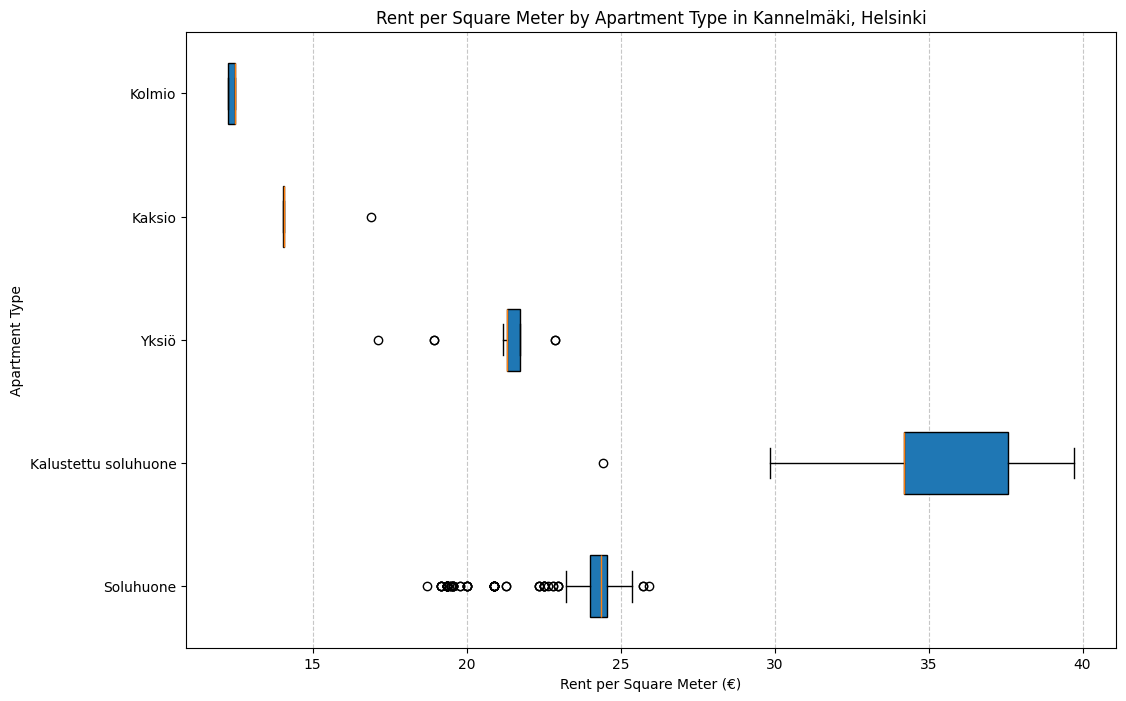

In [24]:
df_kantsu = df_expanded[df_expanded['location'] == 'Kannelmäki, Helsinki'].copy()

print(df_kantsu['type'].value_counts())

print(df_kantsu.groupby('type')['rent'].mean())

# Create boxplots for different types of apartments by "rent_sqm"
apartment_types = df_kantsu['type'].unique()

# Prepare data for boxplot
data_to_plot = [df_kantsu[df_kantsu['type'] == apt_type]['rent_sqm'].dropna() for apt_type in apartment_types]

# Plot boxplot by apartment type
plt.figure(figsize=(12, 8))
plt.boxplot(data_to_plot, vert=False, patch_artist=True, tick_labels=apartment_types)
plt.xlabel('Rent per Square Meter (€)')
plt.ylabel('Apartment Type')
plt.title('Rent per Square Meter by Apartment Type in Kannelmäki, Helsinki')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [25]:
# average rent by square meter for studios in top_7_and_pasila by location:
studios = df_expanded[df_expanded['type'] == 'Yksiö'].copy()
print(len(yksio))
top_7_studios += ['Länsi-Pasila, Helsinki']
top_7_studios += ['Kannelmäki, Helsinki']
studios = studios[studios['location'].isin(top_7_studios)]
rent_sqm_by_location = studios.groupby('location')['rent_sqm'].mean().round(1)
print(rent_sqm_by_location)

3683
location
Jokiniemi-Tikkurila, Vantaa    20.9
Kalasatama, Helsinki           26.4
Kamppi, Helsinki               24.5
Kannelmäki, Helsinki           21.4
Koskela-Kumpula, Helsinki      22.0
Länsi-Pasila, Helsinki         22.3
Myllypuro, Helsinki            24.1
Otaniemi-Tapiola, Espoo        26.1
Viikki, Helsinki               19.0
Name: rent_sqm, dtype: float64


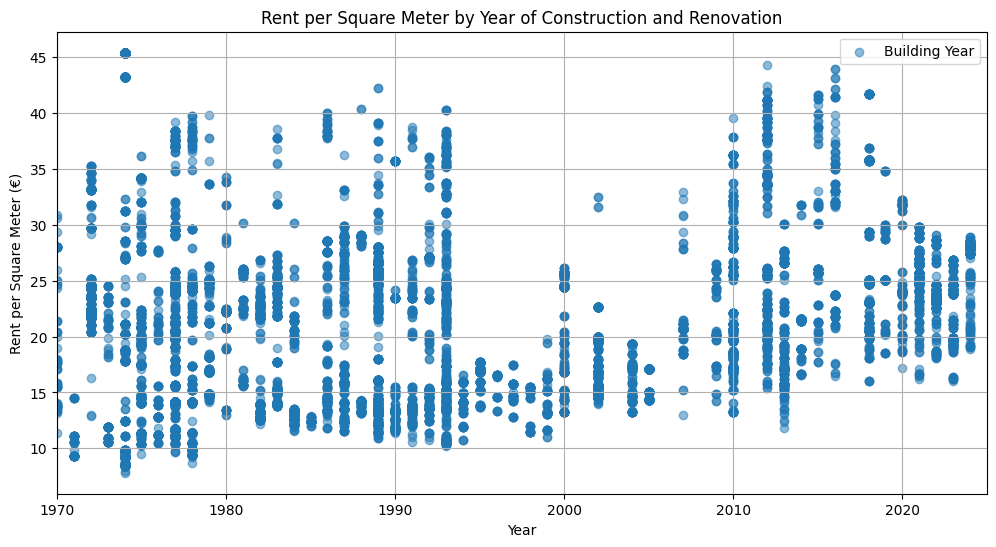

In [26]:
# Rents by year of construction and years since renovation
plt.figure(figsize=(12, 6))
plt.scatter(df_expanded['building_year'], df_expanded['rent_sqm'], alpha=0.5, label='Building Year')
#plt.scatter(df_expanded['years_since_reno'], df_expanded['rent_sqm'], alpha=0.5, label='Years since renovation')
plt.xlabel('Year')
plt.xlim(1970, 2025)
plt.ylabel('Rent per Square Meter (€)')
plt.title('Rent per Square Meter by Year of Construction and Renovation')
plt.legend()
plt.grid(True)
plt.show()


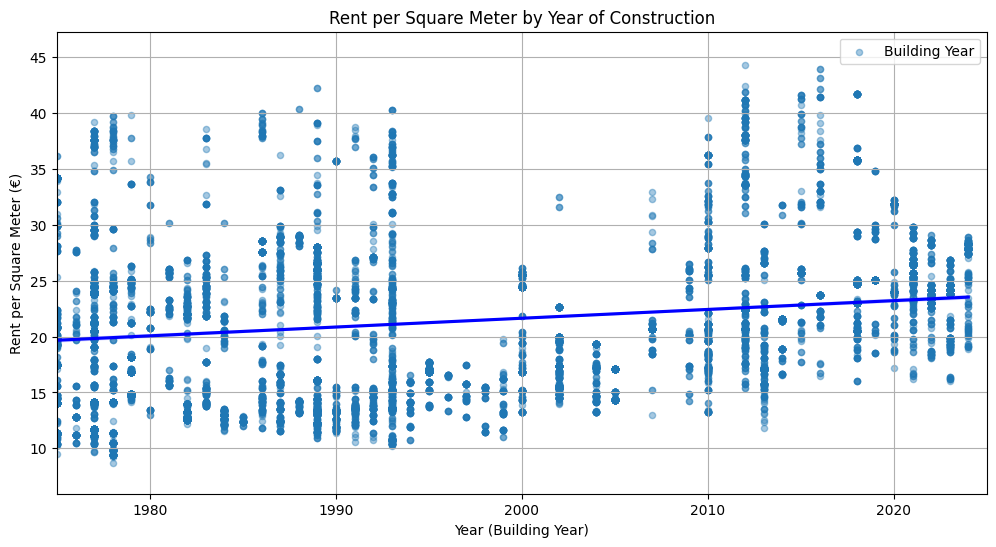

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot rent per sqm vs. building year
sns.regplot(
    x=df_expanded['building_year'], 
    y=df_expanded['rent_sqm'], 
    scatter_kws={'alpha': 0.4, 's': 20}, 
    line_kws={'color': 'blue'},
    label='Building Year'
)

# Plot rent per sqm vs. years since renovation
"""sns.regplot(
    x=df_expanded['years_since_reno'], 
    y=df_expanded['rent_sqm'], 
    scatter_kws={'alpha': 0.4, 's': 20}, 
    line_kws={'color': 'red'},
    label='Years Since Renovation'
)"""

plt.xlabel('Year (Building Year)')
plt.xlim(1975, 2025)
plt.ylabel('Rent per Square Meter (€)')
plt.title('Rent per Square Meter by Year of Construction')
plt.legend()
plt.grid(True)
plt.show()
